In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


## Loading data

In [4]:
hotel_data = pd.read_csv('C:\\Users\\kundu\\Downloads\\hotel_bookings_data.csv')


In [5]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#overview of data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
hotel_data.shape


(119210, 30)

There are null values in the data in two columns agent and company 
There are 31 columns in the data


In [7]:
#dropping null value columns
hotel_data.drop(['company','agent'],axis=1,inplace=True)

In [8]:
#statistical view of the data
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
#checking the scenario where adults children and babies are zero
filter = (hotel_data.children == 0) & (hotel_data.adults == 0) & (hotel_data.babies == 0)
hotel_data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [10]:
#deleting the data with the above condition
hotel_data = hotel_data[~filter]

In [11]:
#checking integer and object columns
int_columns = hotel_data.select_dtypes(include=['int','float']).columns
print('number of integer columns:',len(int_columns))
print(int_columns)

number of integer columns: 18
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [12]:
cat_columns = hotel_data.select_dtypes(include='object').columns
print('number of categorical columns:',len(cat_columns))
print(cat_columns)

number of categorical columns: 12
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


## Exploratory Data Analysis

In [13]:
target_data_summary = hotel_data.groupby(by ='is_canceled').sum()
target_data_summary=target_data_summary.reset_index()
target_data_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,6007033,151233236,2031040,1188085,69615,184677,137534,7693.0,780,3205,1182,15232,21737,119094,7513792.76,7457,53592
1,1,6403828,89112777,1207106,695280,40899,113252,84102,4710.0,169,550,9212,1111,4346,157618,4641942.67,0,14537


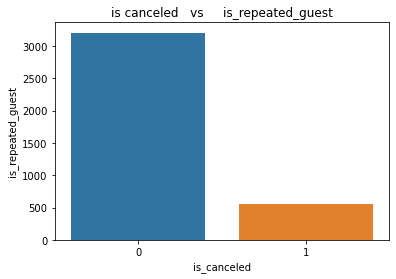

In [14]:
sns.barplot(x='is_canceled',y='is_repeated_guest',data=target_data_summary)
plt.title('is canceled   vs     is_repeated_guest')
plt.show()


Hotel booking cancellation count is less for repeated guests compared rare guests

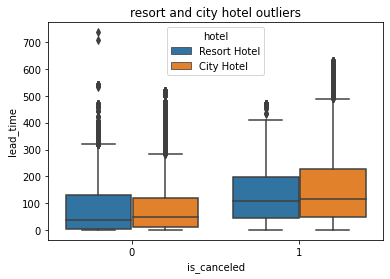

In [15]:
#Booking or Reservation Lead Time is the period of time (most typically measured in calendar days)
#between when a guest makes the reservation and the actual check-in/arrival date.

sns.boxplot(x='is_canceled',y='lead_time',hue='hotel',data=hotel_data)
plt.title('resort and city hotel outliers')
plt.show()

There are outliers in the leadtime

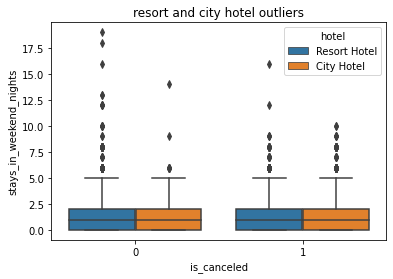

In [16]:
sns.boxplot(x='is_canceled',y='stays_in_weekend_nights',hue='hotel',data=hotel_data)
plt.title('resort and city hotel outliers')
plt.show()

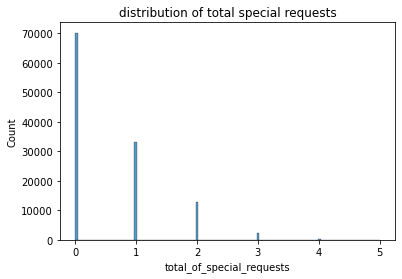

In [17]:
sns.histplot(x='total_of_special_requests',data=hotel_data)
plt.title('distribution of total special requests')
plt.show()

Till now we have explored the outliers through data visualization. detecting the outliers in the overall dataframe is the next task

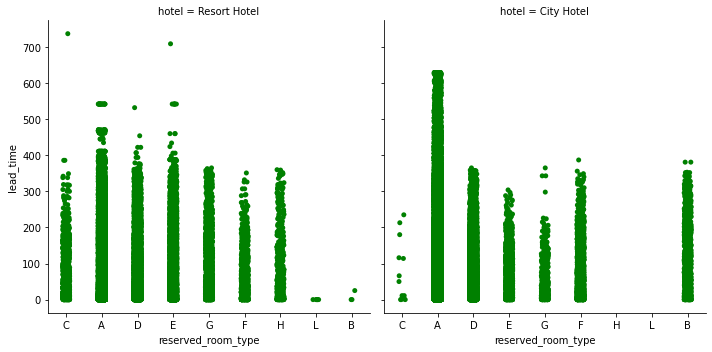

In [18]:
sns.catplot(data=hotel_data,x='reserved_room_type',y='lead_time',col='hotel',color='green')
plt.show()

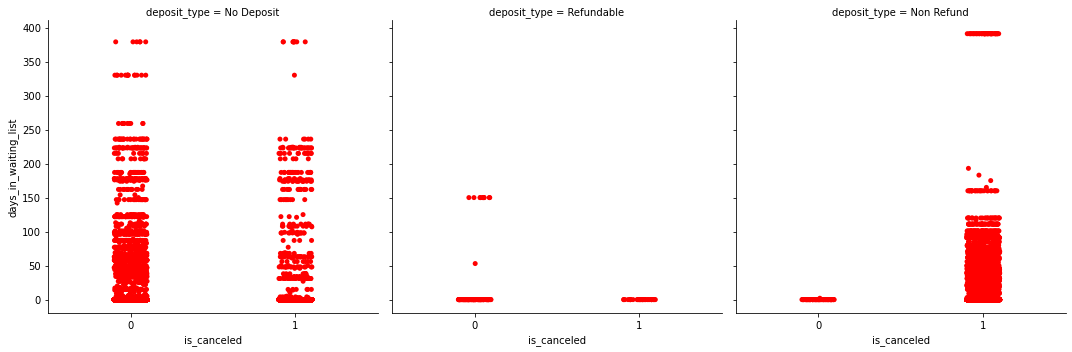

In [19]:
sns.catplot(data=hotel_data,y='days_in_waiting_list',x='is_canceled',col='deposit_type',color='red')
plt.show()

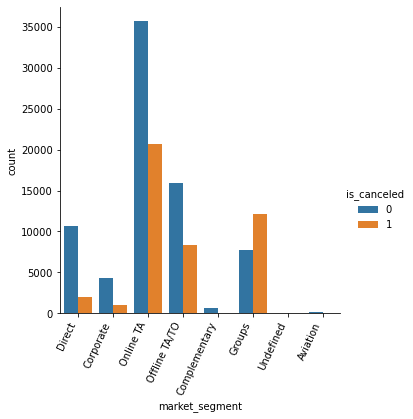

In [20]:
chart=sns.catplot(data=hotel_data, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.show()

Conclusions:

1. Cancellation count is less for repeated guests

2. Lead time is less for confirm bookings lead time is less for resort hotels

3. Stay in weekend nights is equal for both confirm and cancelled cases in both the hotels but the outliers are high in confirmed classes

4. Distribution of total special requests is left skewed

5. Lead time is high for room types C,A and D for both the hotels

6. Deposit type is refundable waiting list days are same but the other categories it is high.

## Detection of outliers

## Z score

In [21]:
#seperating the int columns from the data
int_data = hotel_data[int_columns]
cat_data = hotel_data[cat_columns]
# int_data

In [22]:
#calculating the z score for the entire dataframe
z = np.abs(stats.zscore(int_data))

In [23]:
threshold = 3
print(np.where(z > 3))

(array([     0,      1,      1, ..., 119185, 119196, 119207], dtype=int64), array([13,  1, 13, ..., 15, 17, 17], dtype=int64))


## Detection of outliers with IQR

In [24]:
Q1 = int_data.quantile(0.25)
Q3 = int_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                         1.0
lead_time                         143.0
arrival_date_year                   1.0
arrival_date_week_number           22.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                2.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                56.5
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


In [25]:
#removing the outliers
hotel_data[int_data.columns] = int_data[~(int_data < (Q1 - 1.5 * IQR)) |(int_data > (Q3 + 1.5 * IQR))]

In [26]:
le = LabelEncoder()
hotel_data = hotel_data.apply(LabelEncoder().fit_transform)

In [27]:
#seperating the features and targets
X = hotel_data.drop('is_canceled',axis=1)
y = hotel_data['is_canceled']
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)